## 6-2 Chatbot Data EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Twitter

from functools import reduce
from wordcloud import WordCloud

In [2]:
data_df = pd.read_csv('Chatbot_data/ChatbotData .csv', encoding='utf-8')

In [3]:
data_df.head(5)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


1. 질의 응답 문장에 대한 길이
    - 최장, 최단, 중간, 평균, 분산
    - 데이터 길이에 대한 그래프 분포
    - 아웃라이어에 대한 대처
2. 어휘 갯수 (어절, 형태소)
    - 전체 어휘 분포 
    - word min freq를 어떻게 설정할 것인지
    - stop word가 필요한 것인지


## 문장 길이에 대한 분석

### QA 문장 전체

In [4]:
sentences = list(data_df['Q']) + list(data_df['A'])

In [5]:
len(sentences)

23646

#### 어절단위

In [6]:
tokenized_sentences = [s.split() for s in sentences]

In [7]:
sent_len_by_token = [len(t) for t in tokenized_sentences]

Text(0,0.5,'Number of Sentences')

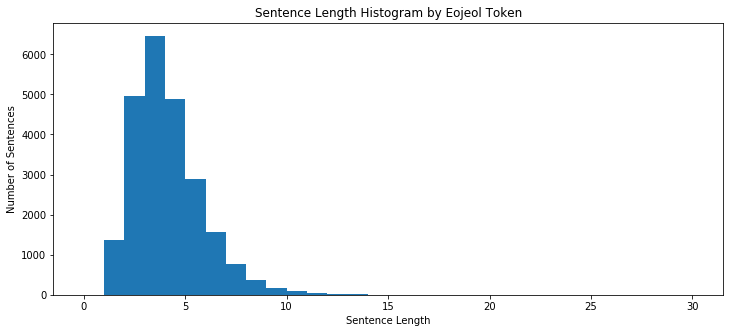

In [8]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=30, range=[0,30])
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0,0.5,'Number of Sentences')

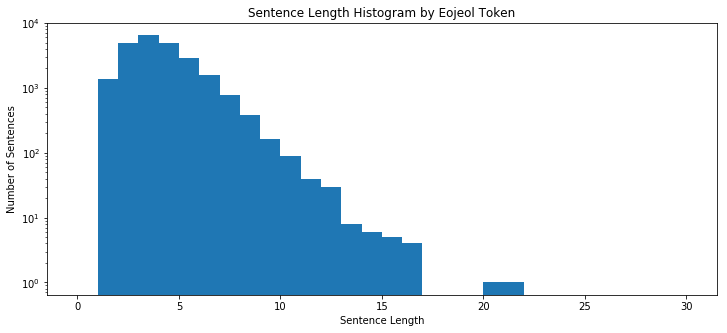

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=30, range=[0,30])
plt.yscale('log', nonposy='clip')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0838ac320>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0838acbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0838ac1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0838c2470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0838c2898>],
 'means': []}

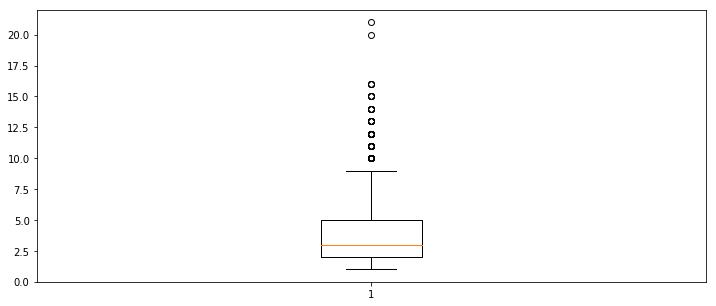

In [10]:
plt.figure(figsize=(12, 5))
plt.boxplot(sent_len_by_token)

#### 음절단위

In [11]:
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

Text(0,0.5,'Number of questions')

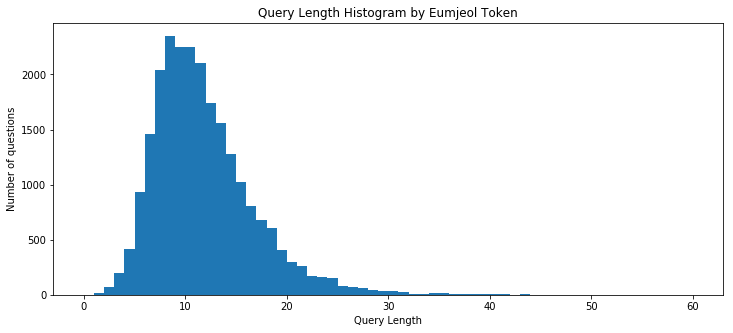

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_eumjeol, bins=60, range=[0,60])
plt.title('Query Length Histogram by Eumjeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of questions')

Text(0,0.5,'Number of questions')

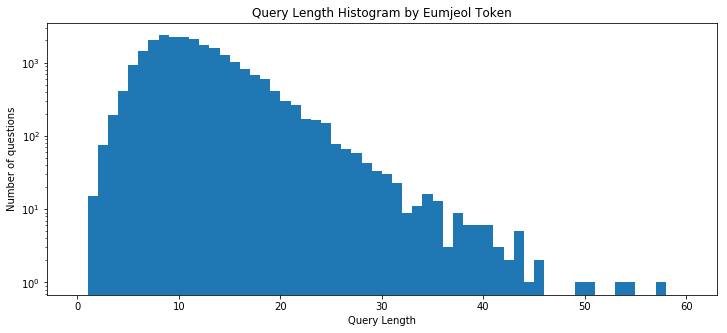

In [13]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_eumjeol, bins=60, range=[0,60])
plt.yscale('log', nonposy='clip')
plt.title('Query Length Histogram by Eumjeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of questions')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0835c68d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0835a01d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0835c6780>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0835a0a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0835a0e48>],
 'means': []}

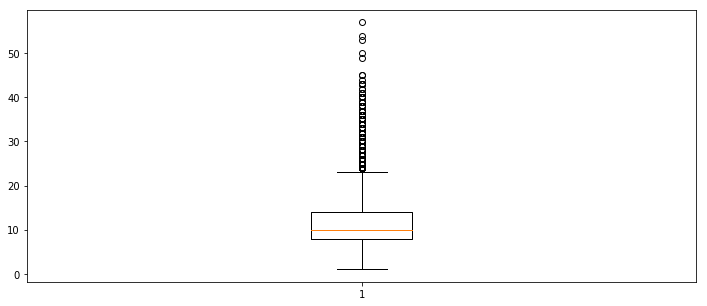

In [14]:
plt.figure(figsize=(12, 5))
plt.boxplot(sent_len_by_eumjeol)

#### 형태소단위

In [15]:
twitter = Twitter()

In [16]:
morph_tokenized_sentences = [twitter.morphs(s.replace(' ', '')) for s in sentences]

In [17]:
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0,0.5,'Number of questions')

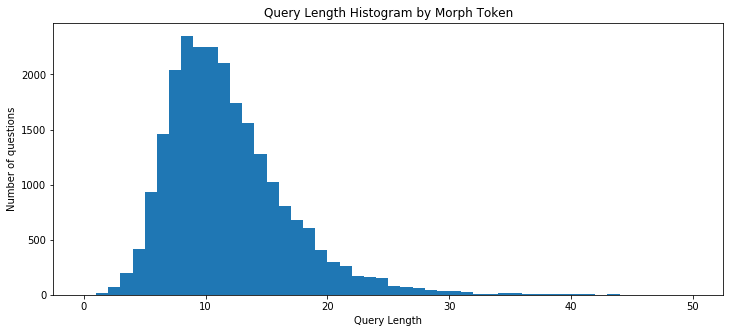

In [18]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50])
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of questions')

Text(0,0.5,'Number of questions')

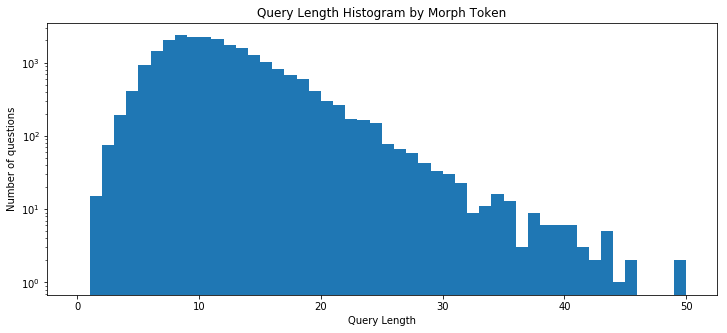

In [19]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50])
plt.yscale('log', nonposy='clip')
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of questions')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0696d1e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0696f9710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0696d1cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0696f9f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0697003c8>],
 'means': []}

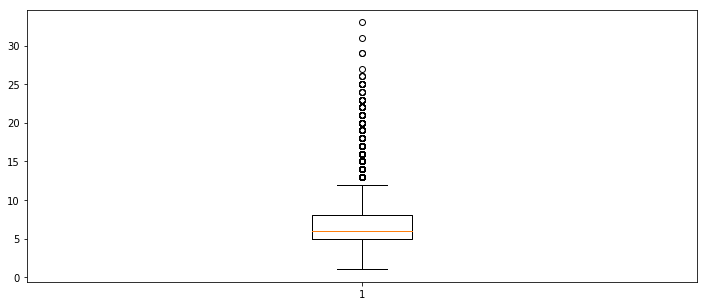

In [20]:
plt.figure(figsize=(12, 5))
plt.boxplot(sent_len_by_morph)

### 종합

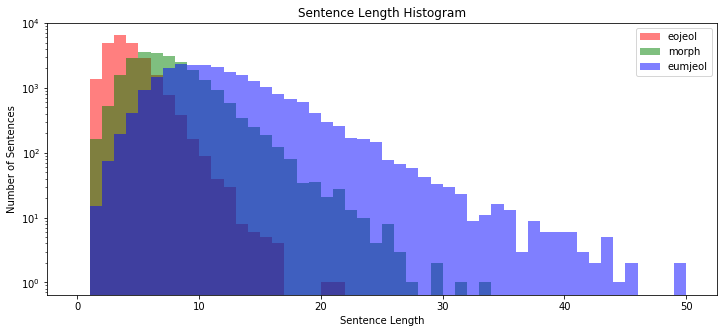

In [21]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log', nonposy='clip')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.legend()

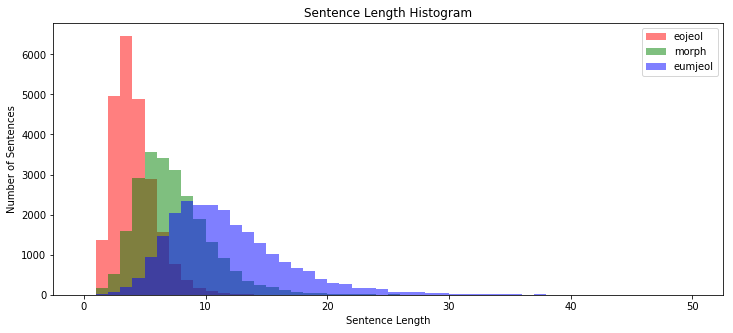

In [22]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.legend()

In [53]:
import numpy as np

print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('어절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('어절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
어절 1/4 퍼센타일 길이: 2.0
어절 3/4 퍼센타일 길이: 5.0


In [54]:

print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 33
형태소 최소길이: 1
형태소 평균길이: 6.88
형태소 길이 표준편차: 3.08
형태소 중간길이: 6.0
형태소 1/4 퍼센타일 길이: 5.0
형태소 3/4 퍼센타일 길이: 8.0


In [56]:

print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb06927dc18>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb069272518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb06927dac8>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb069272d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0692865c0>,
 'means': [<matplotlib.lines.Line2D at 0x7fb0692861d0>,
  <matplotlib.lines.Line2D at 0x7fb069224550>]}

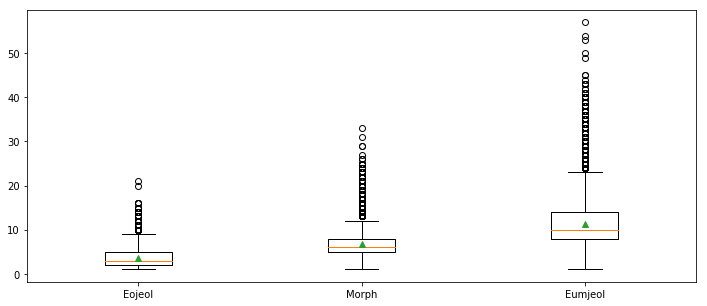

In [26]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], 
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

### 어휘빈도

In [27]:
tokens = list()
for l in tokenized_sentences:
    tokens += l

In [28]:
token_counter = Counter(tokens)

#### 어절

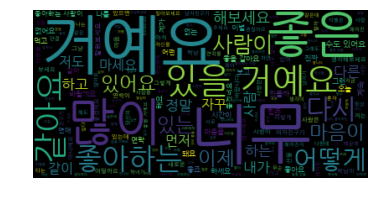

In [29]:
tokens = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in tokenized_sentences]) 
token_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(tokens)
plt.imshow(token_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 형태소

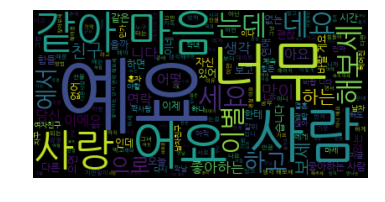

In [30]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in morph_tokenized_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 명사, 동사, 형용사 기준

In [31]:
NV_morph_token_sentences = list()
for s in sentences:
    temp_token_bucket = list()
    for token, tag in twitter.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            temp_token_bucket.append(token)
    if not len(temp_token_bucket) == 0:
        NV_morph_token_sentences.append(temp_token_bucket)    

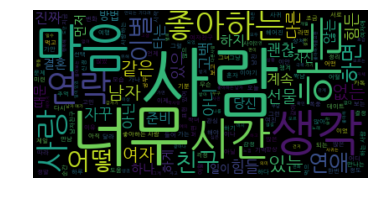

In [32]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in NV_morph_token_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Q 파트 A 파트 비교

In [33]:
query_sentences = list(data_df['Q'])
query_tokenized_sentences = [s.split() for s in query_sentences]
query_sent_len_by_token = [len(t) for t in query_tokenized_sentences]

query_morph_tokenized_sentences = [twitter.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

query_sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in query_sentences]

answer_sentences = list(data_df['A'])
answer_tokenized_sentences = [s.split() for s in answer_sentences]
answer_sent_len_by_token = [len(t) for t in answer_tokenized_sentences]

answer_morph_tokenized_sentences = [twitter.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

answer_sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in answer_sentences]

### 어절

Text(0,0.5,'Number of queries')

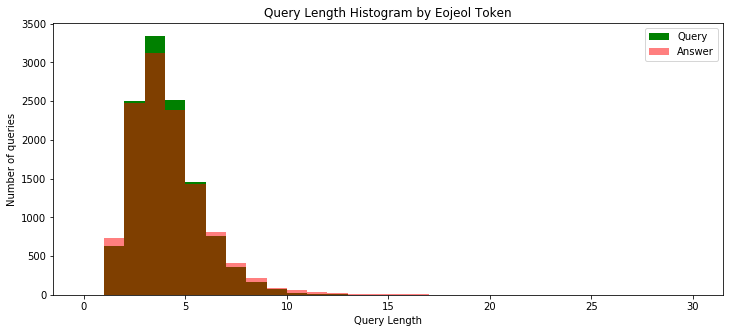

In [34]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_token, bins=30, range=[0,30], color='g', label='Query')
plt.hist(answer_sent_len_by_token, bins=30, range=[0,30], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Eojeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of queries')

Text(0,0.5,'Number of Queries')

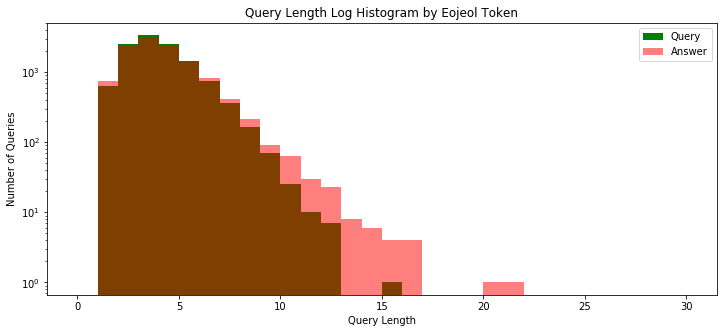

In [35]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_token, bins=30, range=[0,30], color='g', label='Query')
plt.hist(answer_sent_len_by_token, bins=30, range=[0,30], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Eojeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb059573da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb059567898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb059573908>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb059567e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb05958c240>,
 'means': []}

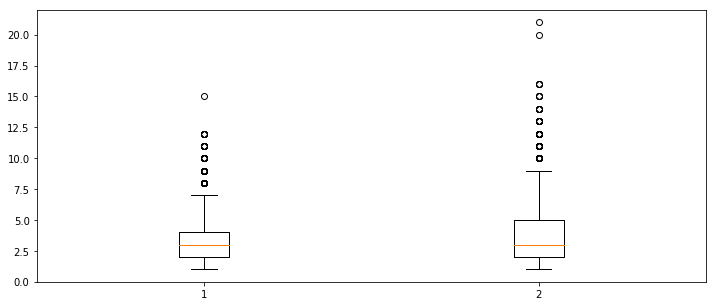

In [36]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_token, answer_sent_len_by_token])

### 형태소기준

Text(0,0.5,'Number of Queries')

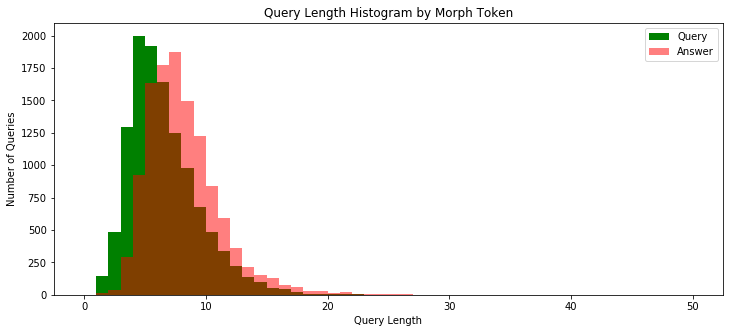

In [37]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0,0.5,'Number of Queries')

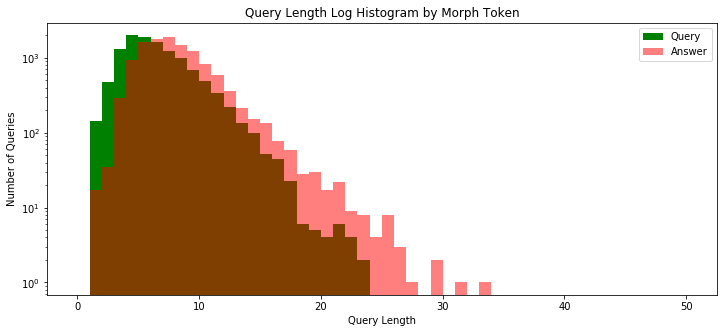

In [38]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [59]:

print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

형태소 최대길이: 23
형태소 최소길이: 1
형태소 평균길이: 6.09
형태소 길이 표준편차: 2.88
형태소 중간길이: 6.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 8.0


In [60]:

print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))


형태소 최대길이: 33
형태소 최소길이: 1
형태소 평균길이: 7.67
형태소 길이 표준편차: 3.08
형태소 중간길이: 7.0
형태소 1/4 퍼센타일 길이: 6.0
형태소 3/4 퍼센타일 길이: 9.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb04bfec828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb04bfe7128>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb04bfec6d8>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb04bfe7978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb04bfe7da0>,
 'means': []}

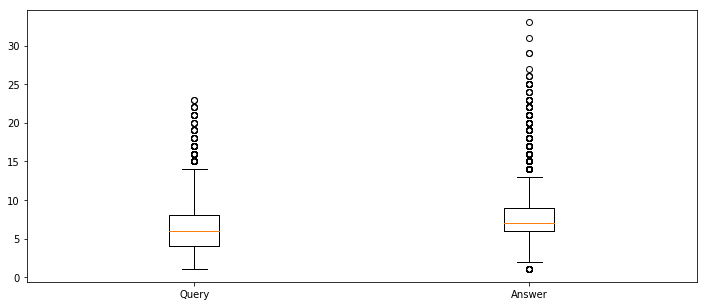

In [58]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
           labels=['Query', 'Answer'])

### 음절기준

Text(0,0.5,'Number of Queries')

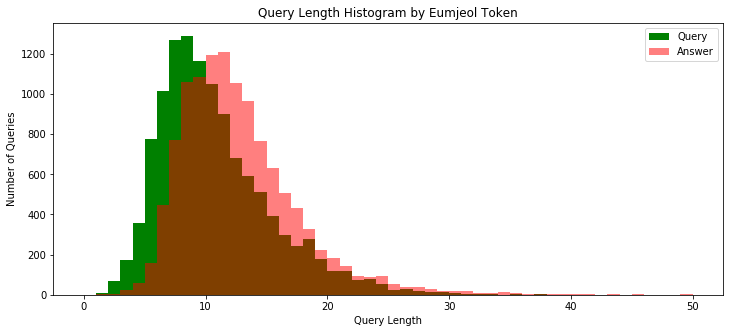

In [40]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_eumjeol, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_eumjeol, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Eumjeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0,0.5,'Number of Queries')

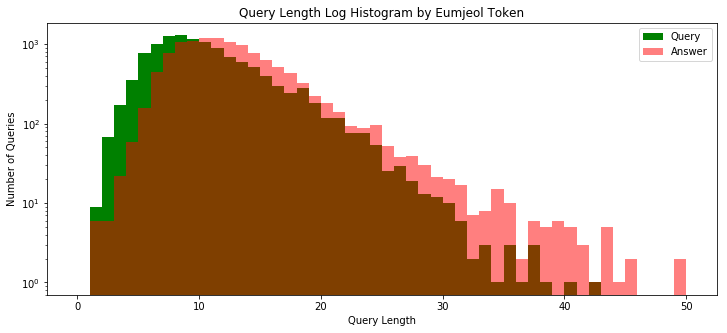

In [41]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_eumjeol, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_eumjeol, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.title('Query Length Log Histogram by Eumjeol Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb058d2c128>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb058d2c9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb058cfef98>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb058d33278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb058d336a0>,
 'means': []}

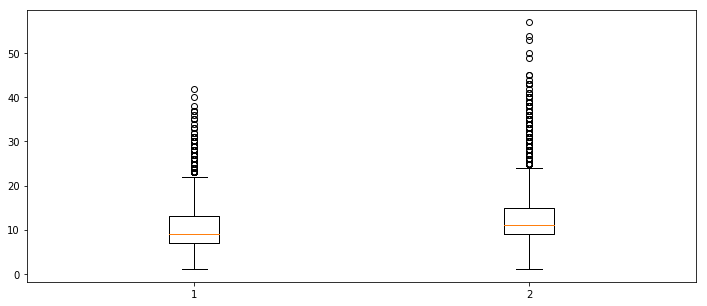

In [42]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_eumjeol, answer_sent_len_by_eumjeol])

### 질문데이터 기준 음절단위

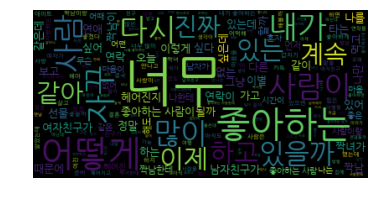

In [43]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in query_tokenized_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 응답데이터 기준 음절단위

(-0.5, 399.5, 199.5, -0.5)

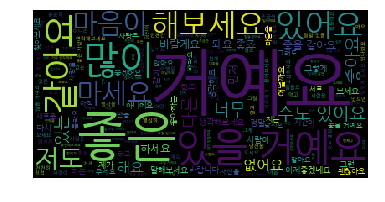

In [66]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in answer_tokenized_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud)#, interpolation='bilinear')
plt.axis('off')

### 질문데이터 기준 형태소단위

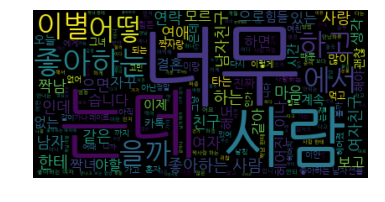

In [45]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in query_morph_tokenized_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 응답데이터 기준 형태소단위

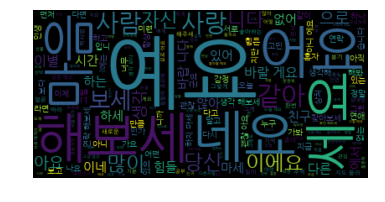

In [46]:
morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in answer_morph_tokenized_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 질문 응답 데이터 기준 명사, 동사, 형용사 

In [61]:
twitter.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'),
 ('은', 'Josa'),
 ('유난히', 'Adverb'),
 ('덥', 'Adjective'),
 ('구나', 'Eomi')]

In [47]:
query_NV_morph_token_sentences = list()
for s in query_sentences:
    temp_token_bucket = list()
    for token, tag in twitter.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            temp_token_bucket.append(token)
    if not len(temp_token_bucket) == 0:
        query_NV_morph_token_sentences.append(temp_token_bucket)    

In [48]:
answer_NV_morph_token_sentences = list()
for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in twitter.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            temp_token_bucket.append(token)
    if not len(temp_token_bucket) == 0:
        answer_NV_morph_token_sentences.append(temp_token_bucket)    

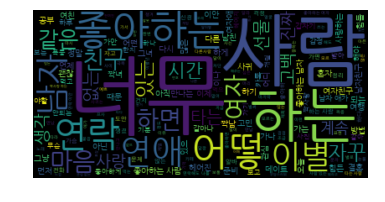

In [49]:
query_morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in query_NV_morph_token_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(query_morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

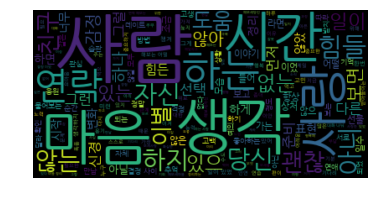

In [50]:
answer_morphs = reduce(lambda x, y: x+y, [reduce(lambda x, y: x + ' ' + y, s) for s in answer_NV_morph_token_sentences]) 
morph_word_cloud = WordCloud(font_path='NanumGothic.ttf').generate(answer_morphs)
plt.imshow(morph_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()